# CAR PRICE PREDICTION

## Importing Libraries

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

## Data Collection and Processing

In [111]:
carprice = pd.read_csv('CarPrice.csv')

In [112]:
carprice.head()              #Prints the first five rows of the data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [113]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [114]:
carprice.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Data Analysis

In [115]:
carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Visualizing the Data

In [116]:
carprice.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [117]:
carprice.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [118]:
carprice.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [119]:
carprice.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [120]:
carprice.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [121]:
carprice.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [122]:
carprice.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [123]:
carprice.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [124]:
carprice.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

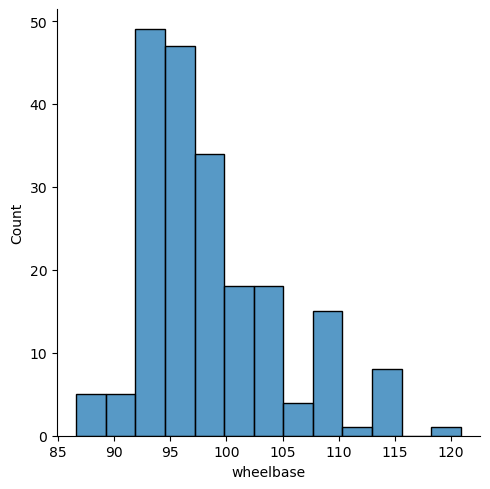

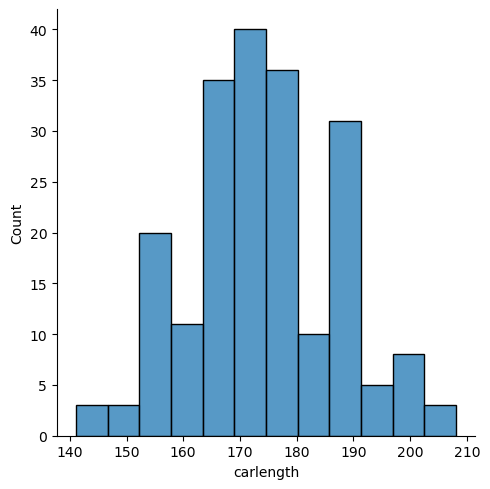

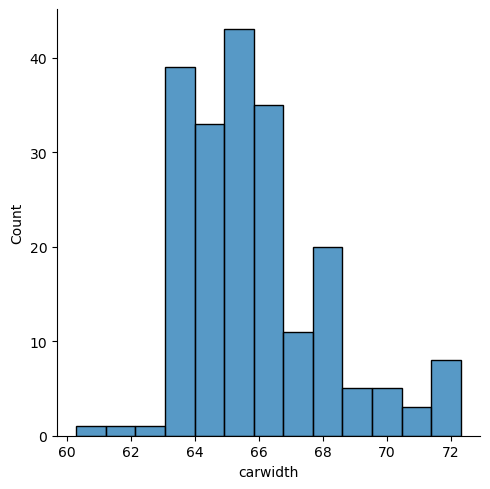

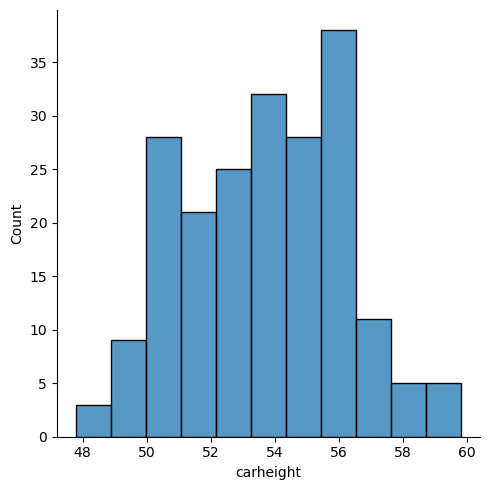

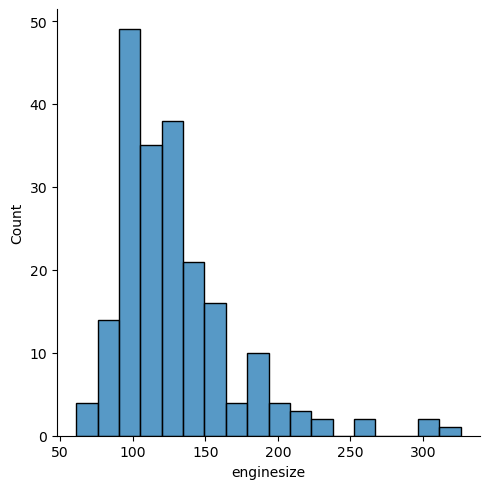

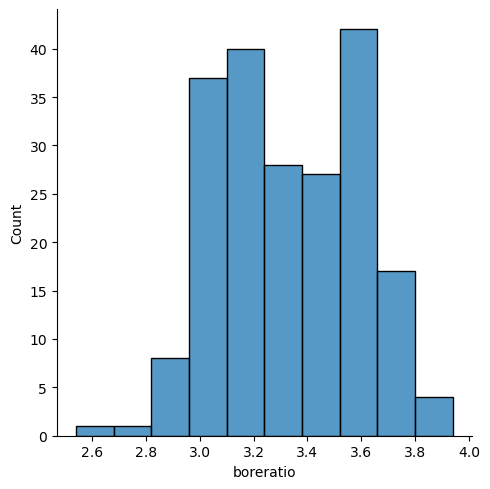

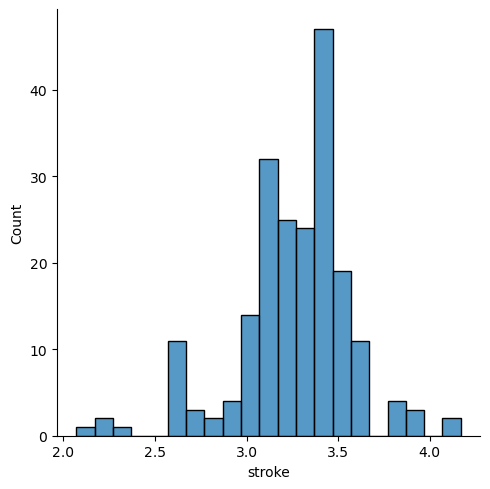

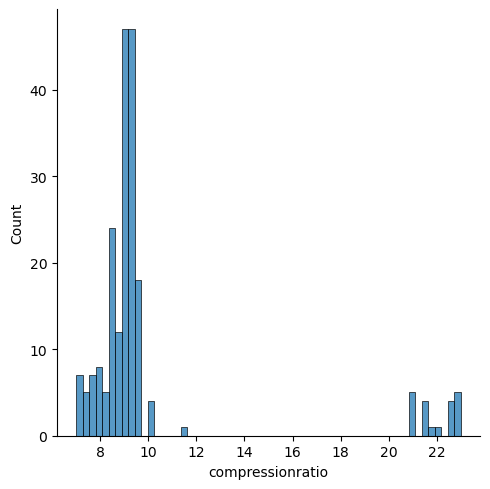

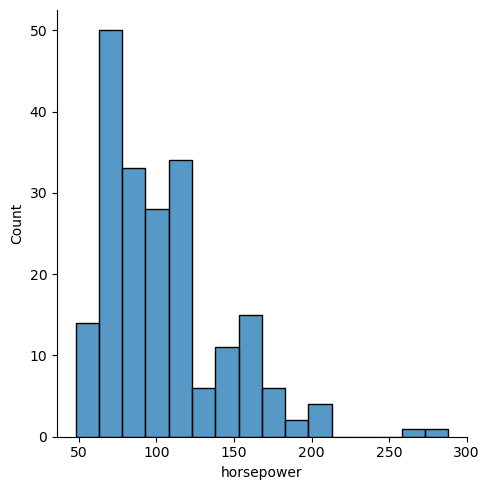

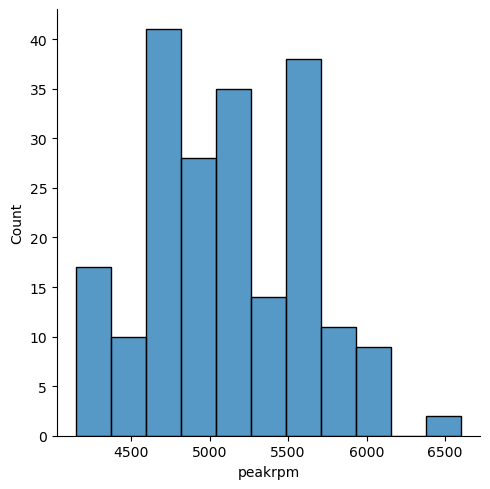

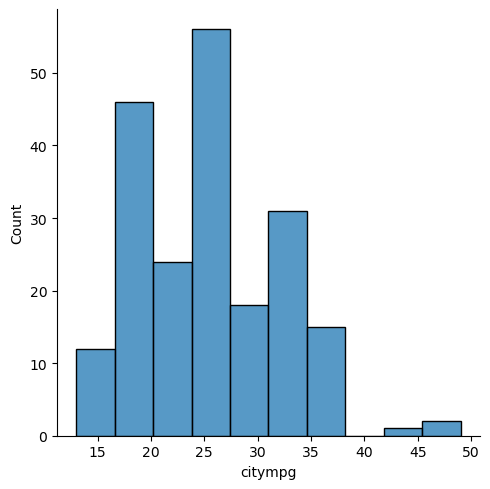

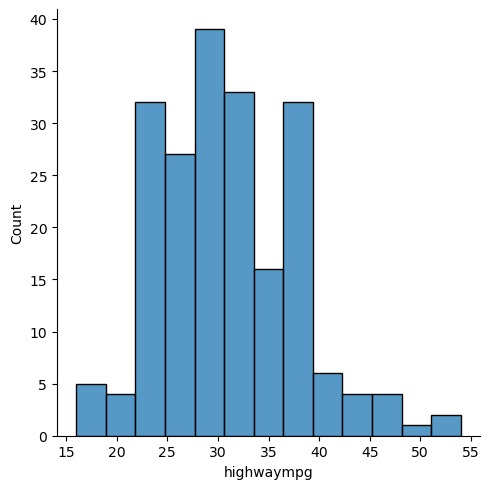

In [125]:
# Distribution plots

sns.displot(carprice['wheelbase'])
sns.displot(carprice['carlength'])
sns.displot(carprice['carwidth'])
sns.displot(carprice['carheight'])
sns.displot(carprice['enginesize'])
sns.displot(carprice['boreratio'])
sns.displot(carprice['stroke'])
sns.displot(carprice['compressionratio'])
sns.displot(carprice['horsepower'])
sns.displot(carprice['peakrpm'])
sns.displot(carprice['citympg'])
sns.displot(carprice['highwaympg'])

## Co-relation between Columns

In [126]:
correlation = carprice.corr()

C:\Users\purna\AppData\Local\Temp\ipykernel_29180\2399056046.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = carprice.corr()


<Axes: >

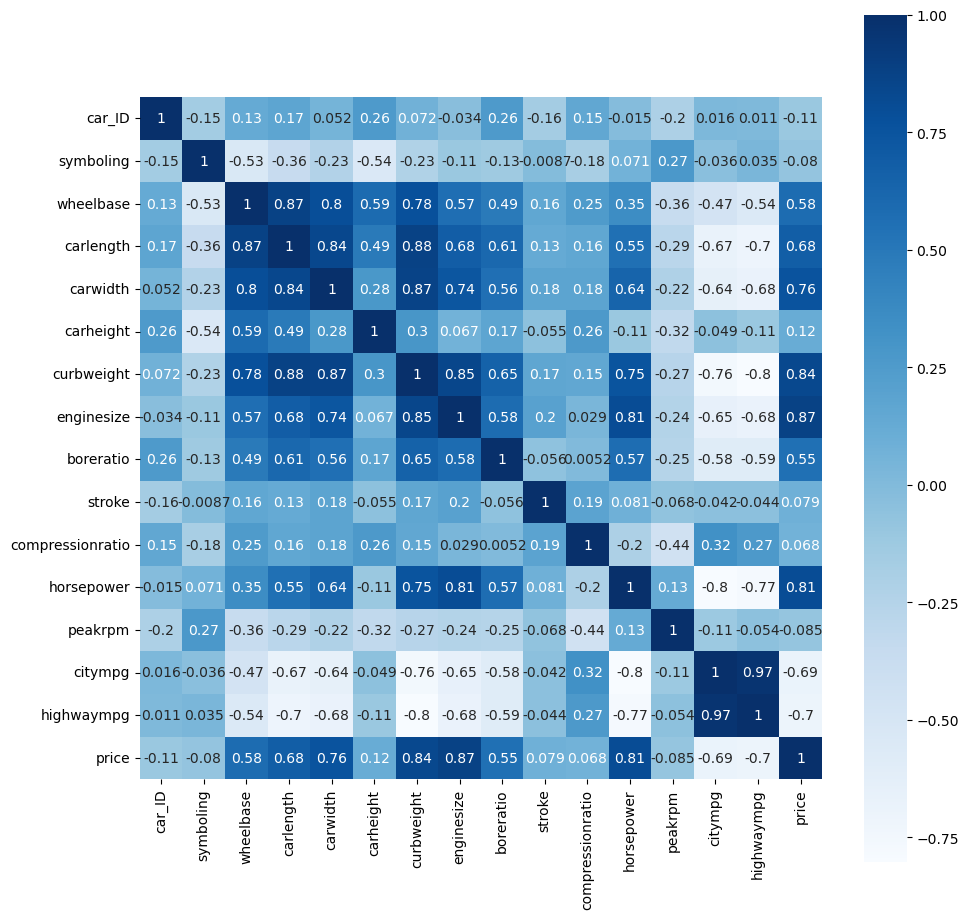

In [127]:
plt.figure(figsize = (11,11))

sns.heatmap(correlation, square = True, annot = True, annot_kws = {'size': 10},
           cmap = 'Blues')

# This gives the co-relation between the columns of the dataset.
# The values close to 1 represent that they are more co-related with each other

## Converting text data into Numerical data

In [128]:
carprice.replace({"fueltype": {'gas': 0, 'diesel': 1}}, inplace = True)
carprice.replace({"aspiration": {'std': 0, 'turbo': 1}}, inplace = True)
carprice.replace({"doornumber": {'four': 0, 'two': 1}}, inplace = True)
carprice.replace({"carbody": {'sedan': 0, 'hatchback': 1,
                             'wagon': 2, 'hardtop': 3,
                             'convertible': 4}}, inplace = True)
carprice.replace({"drivewheel": {'fwd': 0, 'rwd': 1, '4wd': 2}}, inplace = True)
carprice.replace({"enginelocation": {'front': 0, 'rear': 1}}, inplace = True)
carprice.replace({"fuelsystem": {'mpfi': 0, '2bbl': 1,
                                'idi': 2, '1bbl': 3, 'spdi': 4,
                                '4bbl': 5, 'mfi': 6, 'spfi': 7}}, inplace = True)
carprice.replace({"fueltype": {'gas': 0, 'diesel': 1}}, inplace = True)
carprice.replace({"enginetype": {'ohc': 0, 'ohcf': 1, 'ohcv': 2,
                                'dohc': 3, 'l': 4, 'rotor': 5,
                                'dohcv': 6}}, inplace = True)
carprice.replace({"cylindernumber": {'four': 0, 'six': 1, 'five': 2,
                                    'eight': 3, 'two': 4, 'three': 5,
                                    'twelve': 6}}, inplace = True)

In [129]:
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,1,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,1,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,1,1,1,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,0,0,0,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,0,0,2,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


## Variable Creation for Train_Test_Split

In [130]:
X = carprice.drop(columns = ['car_ID', 'CarName', 'price'])
y = carprice['price']

In [133]:
X.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,0,0,1,4,1,0,88.6,168.8,64.1,...,0,130,0,3.47,2.68,9.0,111,5000,21,27
1,3,0,0,1,4,1,0,88.6,168.8,64.1,...,0,130,0,3.47,2.68,9.0,111,5000,21,27
2,1,0,0,1,1,1,0,94.5,171.2,65.5,...,1,152,0,2.68,3.47,9.0,154,5000,19,26
3,2,0,0,0,0,0,0,99.8,176.6,66.2,...,0,109,0,3.19,3.40,10.0,102,5500,24,30
4,2,0,0,0,0,2,0,99.4,176.6,66.4,...,2,136,0,3.19,3.40,8.0,115,5500,18,22


In [134]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

## Splitting training and testing data

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1)

In [151]:
print(X.shape, X_train.shape, X_test.shape)

(205, 23) (184, 23) (21, 23)


## Training the model

In [152]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## Predictions

In [153]:
prediction = model.predict(X_test)
prediction

array([ 5846.4976,  9267.175 , 13876.129 ,  7368.1055,  6767.3296,
       21286.225 ,  7687.1934, 15990.503 ,  8009.0312, 15761.208 ,
       38104.53  ,  7894.308 ,  5911.824 , 10559.006 , 14317.282 ,
        7108.869 , 17273.232 ,  6052.798 ,  8865.529 ,  8852.483 ,
        6750.9717], dtype=float32)

## Finding Mean Absolute Error

In [160]:
mean = metrics.mean_absolute_error(y_test, prediction)
mean

1149.9834681919642

In [161]:
error_score = metrics.r2_score(y_test, prediction)

In [162]:
error_score

0.9496623910206917